In [4]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

## ETL

In [5]:
df_dados = pd.read_csv(r"C:\Users\nada_\OneDrive\Desktop\REPROGRAMA\projetofinal\listings.csv")
df_dados.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96599,-43.17940,Entire home/apt,310.0,5,319,2024-06-08,1.88,1,274,23,NaN
1,220377,Suíte Casal (banheiro privativo),1142424,Taciana,NaN,Tijuca,-22.92880,-43.24046,Private room,220.0,1,5,2024-03-28,0.03,3,283,1,NaN
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97735,-43.19105,Entire home/apt,203.0,2,291,2024-06-02,1.70,1,241,23,NaN
3,35764,COPACABANA SEA BREEZE - RIO - 25 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98107,-43.19136,Entire home/apt,201.0,3,476,2024-06-25,2.85,1,93,36,NaN
4,223073,Modern Loft 1 • Ipanema Posto 9 • 500 mb,503995,❤️ BrUx ❤️,NaN,Ipanema,-22.98280,-43.20467,Entire home/apt,321.0,1,471,2024-06-02,3.04,7,348,17,NaN


In [6]:
df_dados.shape 

(34664, 18)

In [7]:
nulos_por_colunas = df_dados.isnull().sum()
print(nulos_por_colunas)

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group               34664
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                               972
minimum_nights                        0
number_of_reviews                     0
last_review                        8446
reviews_per_month                  8446
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           34664
dtype: int64


In [8]:
df_dados.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [9]:
# Substituir NaN pela média de uma coluna price
df_dados['price'] = df_dados['price'].fillna(df_dados['price'].mean())


In [10]:
df_dados = df_dados.drop(columns=["neighbourhood_group","license"])  #apagar colunas do df

In [11]:
df_dados = df_dados.fillna(0)  # Substituir NaN por 0


In [12]:
def visualizar_as_duplicadas(df_dados):  #função para ver as linhas com informações duplicadas
    duplicados = df_dados[df_dados.duplicated(keep=False)]

    return duplicados

linhas_duplicadas = visualizar_as_duplicadas(df_dados)
print (linhas_duplicadas)

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365, number_of_reviews_ltm]
Index: []


In [13]:
nulos_por_colunas = df_dados.isnull().sum()
print(nulos_por_colunas)

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64


In [14]:
nulos_por_linhas = df_dados.isnull().sum(axis=1)  
print(nulos_por_linhas)

0        0
1        0
2        0
3        0
4        0
        ..
34659    0
34660    0
34661    0
34662    0
34663    0
Length: 34664, dtype: int64


In [15]:
info_df = df_dados.info()
print(info_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34664 entries, 0 to 34663
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              34664 non-null  int64  
 1   name                            34664 non-null  object 
 2   host_id                         34664 non-null  int64  
 3   host_name                       34664 non-null  object 
 4   neighbourhood                   34664 non-null  object 
 5   latitude                        34664 non-null  float64
 6   longitude                       34664 non-null  float64
 7   room_type                       34664 non-null  object 
 8   price                           34664 non-null  float64
 9   minimum_nights                  34664 non-null  int64  
 10  number_of_reviews               34664 non-null  int64  
 11  last_review                     34664 non-null  object 
 12  reviews_per_month               

In [16]:
df_dados.describe(include='all')

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3.466400e+04,34664,3.466400e+04,34664,34664,34664.000000,34664.000000,34664,34664.000000,34664.000000,34664.000000,34664.0,34664.000000,34664.000000,34664.000000,34664.000000
unique,NaN,33021,NaN,6002,152,NaN,NaN,4,NaN,NaN,NaN,1285.0,NaN,NaN,NaN,NaN
top,NaN,Apartamento em Copacabana,NaN,Daniel,Copacabana,NaN,NaN,Entire home/apt,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
freq,NaN,116,NaN,348,10783,NaN,NaN,27383,NaN,NaN,NaN,8446.0,NaN,NaN,NaN,NaN
mean,5.590520e+17,NaN,1.979962e+08,NaN,NaN,-22.967415,-43.248751,NaN,731.188235,3.683360,22.303658,NaN,0.821712,9.070909,203.164695,7.660282
std,4.785128e+17,NaN,1.898936e+08,NaN,NaN,0.034793,0.099478,NaN,5587.226596,14.203589,44.086305,NaN,1.139377,24.042257,116.524265,12.011221
min,1.787800e+04,NaN,3.607000e+03,NaN,NaN,-23.073276,-43.723009,NaN,0.000000,1.000000,0.000000,NaN,0.000000,1.000000,0.000000,0.000000
25%,3.616128e+07,NaN,2.714992e+07,NaN,NaN,-22.984610,-43.303282,NaN,200.000000,1.000000,1.000000,NaN,0.020000,1.000000,90.000000,0.000000
50%,7.271246e+17,NaN,1.130967e+08,NaN,NaN,-22.972840,-43.194384,NaN,320.000000,2.000000,5.000000,NaN,0.360000,2.000000,190.000000,2.000000
75%,1.027123e+18,NaN,3.710267e+08,NaN,NaN,-22.956465,-43.185429,NaN,608.000000,3.000000,24.000000,NaN,1.160000,5.000000,320.000000,10.000000


In [17]:
df_dados.nunique()

id                                34664
name                              33021
host_id                           20772
host_name                          6002
neighbourhood                       152
latitude                          21554
longitude                         22985
room_type                             4
price                              2016
minimum_nights                       61
number_of_reviews                   383
last_review                        1285
reviews_per_month                   700
calculated_host_listings_count       59
availability_365                    366
number_of_reviews_ltm               109
dtype: int64

In [18]:
# renomear as colunas
df_dados.rename(columns={              
'name':'Nome',                           
'host_id': 'Id do host',                          
'host_name': 'Nome do host',                        
'neighbourhood': 'Bairro',                       
'latitude': 'Latitude',                        
'longitude': 'Longitude',                      
'room_type': 'Tipo de acomodação',                           
'price':'Preço',                              
'minimum_nights':'Minimo de noites',                       
'number_of_reviews':'Numeros de avaliações',                   
'last_review':'Ultima avaliação',                      
'reviews_per_month':'Avaliações mensais',                   
'calculated_host_listings_count':'Listagens', 
'availability_365':'Disponibilidade anual',                   
'number_of_reviews_ltm':'Numero de avaliações anuais' 
}, inplace=True)

In [19]:
df_dados.columns

Index(['id', 'Nome', 'Id do host', 'Nome do host', 'Bairro', 'Latitude',
       'Longitude', 'Tipo de acomodação', 'Preço', 'Minimo de noites',
       'Numeros de avaliações', 'Ultima avaliação', 'Avaliações mensais',
       'Listagens', 'Disponibilidade anual', 'Numero de avaliações anuais'],
      dtype='object')

In [20]:
# Arredondar apenas a 'Preço' para 1 casa decimal
df_dados['Preço'] = df_dados['Preço'].round(1)



In [21]:
# Arredondar para baixo valores iguais a 731.2 na coluna 'Preço'
df_dados['Preço'] = df_dados['Preço'].apply(lambda x: np.floor(x) if x == 731.2 else x)


In [22]:
df_dados['Preço'].round(0)

0        310.0
1        220.0
2        203.0
3        201.0
4        321.0
         ...  
34659    138.0
34660    800.0
34661    265.0
34662    260.0
34663    250.0
Name: Preço, Length: 34664, dtype: float64

In [23]:
df_dados.head(62)

,id,Nome,Id do host,Nome do host,Bairro,Latitude,Longitude,Tipo de acomodação,Preço,Minimo de noites,Numeros de avaliações,Ultima avaliação,Avaliações mensais,Listagens,Disponibilidade anual,Numero de avaliações anuais
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,Copacabana,-22.96599,-43.17940,Entire home/apt,310.0,5,319,2024-06-08,1.88,1,274,23
1,220377,Suíte Casal (banheiro privativo),1142424,Taciana,Tijuca,-22.92880,-43.24046,Private room,220.0,1,5,2024-03-28,0.03,3,283,1
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,Copacabana,-22.97735,-43.19105,Entire home/apt,203.0,2,291,2024-06-02,1.70,1,241,23
3,35764,COPACABANA SEA BREEZE - RIO - 25 X Superhost,153691,Patricia Miranda & Paulo,Copacabana,-22.98107,-43.19136,Entire home/apt,201.0,3,476,2024-06-25,2.85,1,93,36
4,223073,Modern Loft 1 • Ipanema Posto 9 • 500 mb,503995,❤️ BrUx ❤️,Ipanema,-22.98280,-43.20467,Entire home/apt,321.0,1,471,2024-06-02,3.04,7,348,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,99971,Right in front of the beach in Rio!,525976,Ricardo,Leblon,-22.98812,-43.22897,Entire home/apt,273.0,3,165,2024-04-29,1.05,1,327,23
58,274116,Comfortable apart in Santa Teresa - Rio de Jan...,1433502,Norberto,Santa Teresa,-22.91984,-43.18650,Entire home/apt,136.0,4,46,2024-02-15,0.40,1,2,3
59,106372,Carnaval & Rock in Rio !!!,551316,Katia,Barra da Tijuca,-23.00744,-43.43045,Entire home/apt,731.0,4,9,2022-09-11,0.09,1,362,0
60,278679,"5 min a pé - Praia de Copacabana, Metrô, WiFi II",449677,Renato / Louri,Copacabana,-22.98069,-43.19277,Entire home/apt,199.0,6,55,2024-05-08,0.36,6,96,13


In [24]:
df_dados.to_csv("Projeto_airbnb_rj_tratadoII.csv",index=False)

## Análise dos dados

In [25]:
#Somando o total de acomodações em todos os bairros
contagem_bairros = df_dados["Bairro"].value_counts()
print (contagem_bairros)

Bairro
Copacabana                  10783
Ipanema                      3299
Barra da Tijuca              3242
Recreio dos Bandeirantes     1730
Leblon                       1622
                            ...  
Caju                            1
Zumbi                           1
Deodoro                         1
Parada de Lucas                 1
Manguinhos                      1
Name: count, Length: 152, dtype: int64


In [26]:
# Obter os 10 maiores valores da Serie 
top_10 = contagem_bairros.nlargest (10, keep='all')

print(top_10)

Bairro
Copacabana                  10783
Ipanema                      3299
Barra da Tijuca              3242
Recreio dos Bandeirantes     1730
Leblon                       1622
Jacarepaguá                  1541
Botafogo                     1466
Centro                       1311
Santa Teresa                 1116
Flamengo                      795
Name: count, dtype: int64


In [27]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [28]:
#Qual a média dos preços e a variação por bairro?


#Antes vamos saber o preço médio total
# Calculando preço médio total
preco_medio_total = df_dados['Preço'].mean()
print("\nPreço médio total:", preco_medio_total)


Preço médio total: 731.18295638126


In [29]:
#Agora o preço médio por bairro

# Agrupar por 'bairro' e calcular o preço médio de cada grupo
preco_medio_por_bairro = df_dados.groupby('Bairro')['Preço'].mean()

# Exibir o resultado
print(preco_medio_por_bairro)

Bairro
Abolição              557.500000
Alto da Boa Vista    1319.875000
Anchieta             1876.666667
Andaraí               295.042553
Anil                  549.959184
                        ...     
Vila Militar          227.666667
Vila Valqueire        367.400000
Vila da Penha         250.857143
Zumbi                 115.000000
Água Santa            731.000000
Name: Preço, Length: 152, dtype: float64


In [30]:
#transformando a coluna Preco em tipo numérico
df_dados['Preço'] = pd.to_numeric(df_dados['Preço'], errors='coerce')

In [31]:
#Calculando o preço médio dos 10 bairros com mais acomodaçoes
resultado = pd.merge(top_10, preco_medio_por_bairro, on='Bairro')
print(resultado)

                          count       Preço
Bairro                                     
Copacabana                10783  624.492998
Ipanema                    3299  827.786905
Barra da Tijuca            3242  965.269278
Recreio dos Bandeirantes   1730  636.327746
Leblon                     1622  918.356967
Jacarepaguá                1541  585.137573
Botafogo                   1466  469.556617
Centro                     1311  315.225019
Santa Teresa               1116  475.545699
Flamengo                    795  440.638994


In [32]:
#Ordenando os bairros com valores médios mais altos
resultado_ordenado = resultado.sort_values(by='Preço', ascending=False)
print(resultado_ordenado)

                          count       Preço
Bairro                                     
Barra da Tijuca            3242  965.269278
Leblon                     1622  918.356967
Ipanema                    3299  827.786905
Recreio dos Bandeirantes   1730  636.327746
Copacabana                10783  624.492998
Jacarepaguá                1541  585.137573
Santa Teresa               1116  475.545699
Botafogo                   1466  469.556617
Flamengo                    795  440.638994
Centro                     1311  315.225019


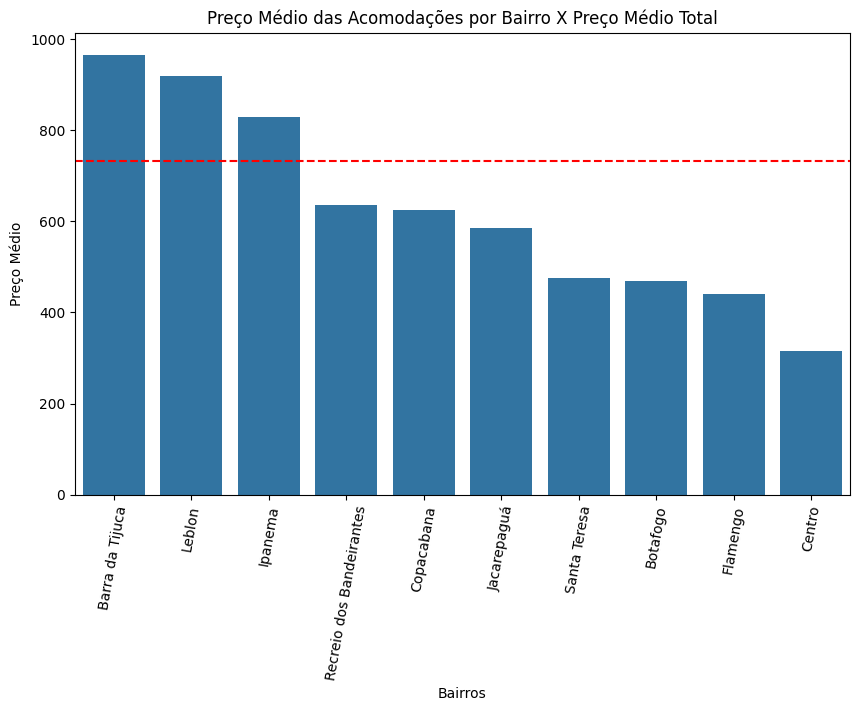

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Bairro', y='Preço', data=resultado_ordenado)
plt.axhline(preco_medio_total, color='red', linestyle='--', label='Preço Médio Total') #média de preços total
plt.xlabel('Bairros')
plt.ylabel('Preço Médio')
plt.title('Preço Médio das Acomodações por Bairro X Preço Médio Total')
plt.xticks(rotation=80)
plt.show()

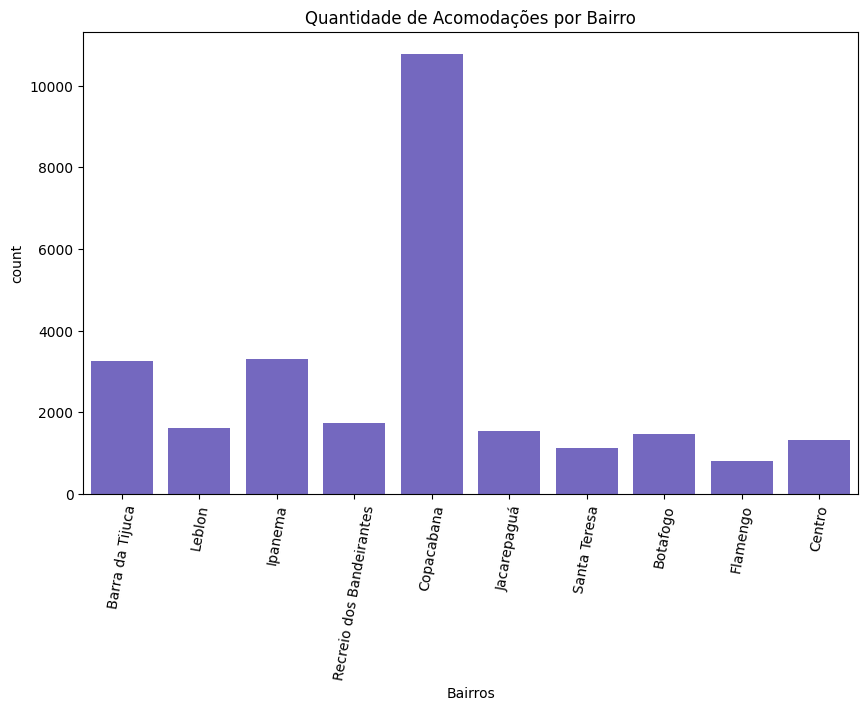

In [34]:
#Qual bairro tem mais disponibilidade de Airbnb?

plt.figure(figsize=(10, 6))
sns.barplot(x='Bairro', y='count', data=resultado_ordenado, color='#6A5ACD')
plt.xlabel('Bairros')
plt.ylabel('count')
plt.title('Quantidade de Acomodações por Bairro')
plt.xticks(rotation=80)
plt.show()

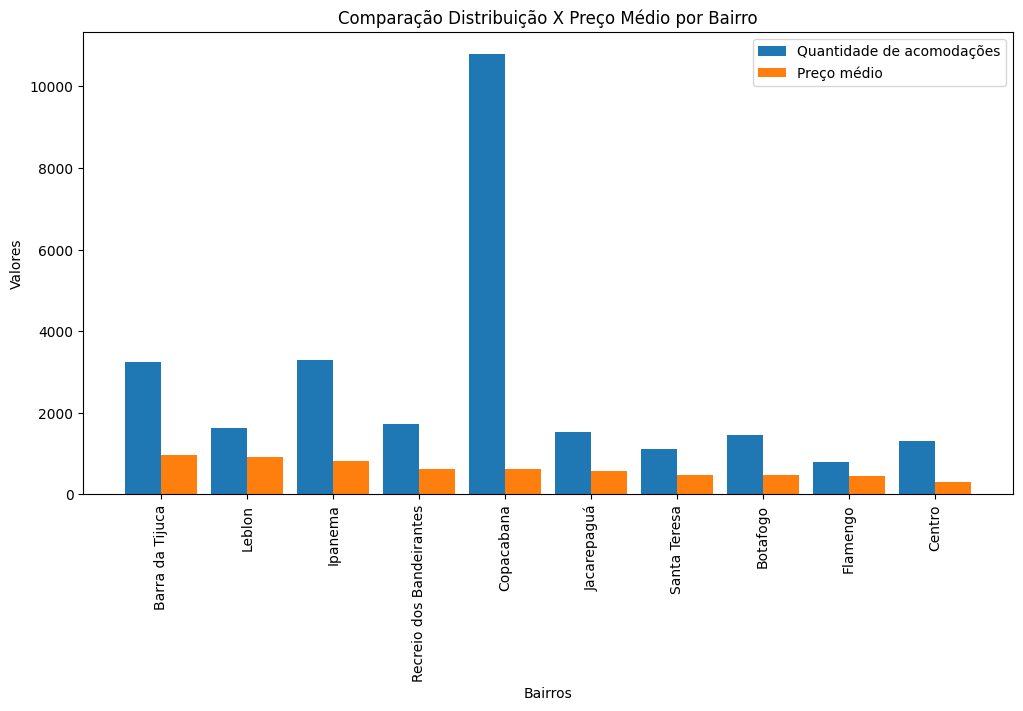

In [35]:
#A quantidae de Airbnb por bairro influencia no preço da acomodação?

# Dados 
bairros = ['Barra da Tijuca','Leblon','Ipanema','Recreio dos Bandeirantes','Copacabana','Jacarepaguá','Santa Teresa','Botafogo','Flamengo','Centro']
contagem = [3242,1622,3299,1730,10783,1541,1116,1466,795,1311]
precos = [965.274954, 918.362762, 827.791331, 636.331908, 624.498210, 585.144711, 475.548387, 469.564120, 440.642516, 315.228528]

largura_barra = 0.5
espacamento = 0.2
posicao1 = np.arange(len(bairros))* (largura_barra * 2 + espacamento)
posicao2 = [p + largura_barra for p in posicao1]

# Criar o gráfico
plt.figure(figsize=(12, 6))
plt.bar(posicao1, contagem, width=largura_barra, label='Quantidade de acomodações')
plt.bar(posicao2, precos, width=largura_barra, label='Preço médio')

# Rotulos
plt.xlabel('Bairros')
plt.ylabel('Valores')
plt.title('Comparação Distribuição X Preço Médio por Bairro')
plt.xticks([p + largura_barra/2 for p in posicao1], bairros, rotation=90)


plt.legend()
plt.show()



In [36]:
#Somando o total de acomodações em todos os bairros
tipo_acomodação = df_dados["Tipo de acomodação"].value_counts()
print (tipo_acomodação)

Tipo de acomodação
Entire home/apt    27383
Private room        6643
Shared room          613
Hotel room            25
Name: count, dtype: int64


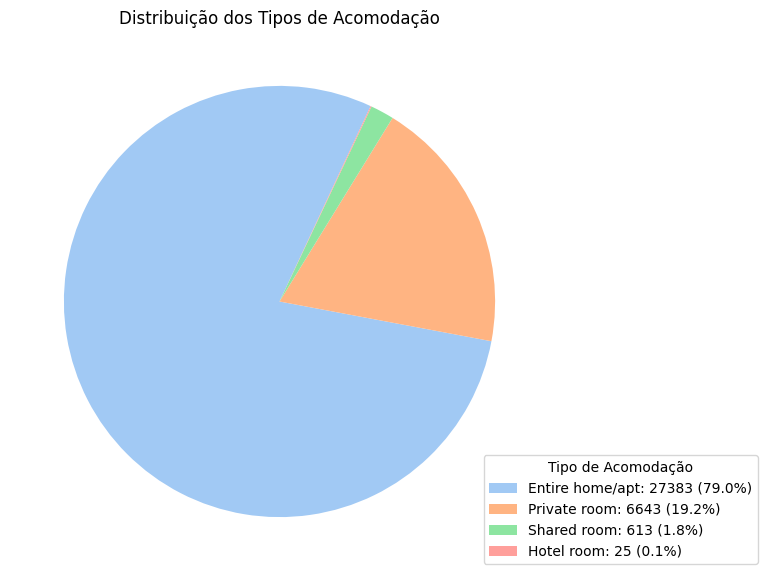

In [37]:
# Obter os dados de contagem do tipo de acomodação
tipo_acomodacao = df_dados["Tipo de acomodação"].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(12, 7))

# Definindo o gráfico de pizza sem rótulos nas fatias
plt.pie(tipo_acomodacao, labels=None, startangle=65, 
        colors=sns.color_palette("pastel"))   

# Adicionar uma legenda com as porcentagens
# A lista de porcentagens para a legenda
porcentagens = [f'{label}: {val} ({val / tipo_acomodacao.sum() * 100:.1f}%)' 
                for label, val in zip(tipo_acomodacao.index, tipo_acomodacao)]
plt.legend(porcentagens, title="Tipo de Acomodação", loc="lower right", bbox_to_anchor=(1.4, 0))

# Adicionar título
plt.title('Distribuição dos Tipos de Acomodação')

# Mostrar o gráfico
plt.show()



In [38]:
# Agrupar por 'bairro' e calcular a média de noites exigidas em cada grupo
media_noite_exigida = df_dados.groupby('Tipo de acomodação')['Minimo de noites'].mean()

# Exibir o resultado
print(media_noite_exigida)

Tipo de acomodação
Entire home/apt    3.850272
Hotel room         1.320000
Private room       3.101460
Shared room        2.629690
Name: Minimo de noites, dtype: float64


In [39]:
# Filtrar apenas as acomodações em Copacabana
copacabana_acomodações = df_dados[df_dados['Bairro'] == 'Copacabana']

# Contar o número de cada tipo de acomodação
tipo_count = copacabana_acomodações['Tipo de acomodação'].value_counts()

# Exibir os resultados
print(tipo_count)

Tipo de acomodação
Entire home/apt    9129
Private room       1529
Shared room         124
Hotel room            1
Name: count, dtype: int64


In [40]:
#Qual host apresenta mais numeros de feedbacks?

maximoavaliações = df_dados["Numeros de avaliações"].max()

print("O host com mais avaliaçõs tem:",maximoavaliações )



O host com mais avaliaçõs tem: 674


In [41]:
#Que host é esse, onde esta situado, qual o tipo de acomodação e o preço?

# Retorna todas as linhas com o valor máximo encontrado
linhas_max_avaliações = df_dados[df_dados["Numeros de avaliações"] == maximoavaliações]

print(linhas_max_avaliações[["Nome", "Bairro","Tipo de acomodação","Preço"]])

                                               Nome      Bairro  \
3154  COPACABANA,PRAIA/METRO,MELHOR CUSTO BENEFÍCIO  Copacabana   

     Tipo de acomodação  Preço  
3154       Private room   98.0  


In [42]:
#Qual host é o mais barato?

# Filtra os preços maiores que 0
df_dados_sem_zero = df_dados[df_dados["Preço"]> 0]

# Encontra o menor valor de preço diferente de 0
maisbarato = df_dados_sem_zero["Preço"].min()

# Retorna as informações do host com o menor preço
host_mais_barato = df_dados_sem_zero[df_dados_sem_zero["Preço"] == maisbarato]

# Exibe o bairro e o número mínimo de noites
print(host_mais_barato[["Bairro", "Minimo de noites", "Preço"]])


        Bairro  Minimo de noites  Preço
5075  Cachambi                80   33.0


In [43]:
#Qual host é o mais caro?

# Filtra os preços maiores que 0
df_dados_sem_zero = df_dados[df_dados["Preço"] > 0]

# Encontra o menor valor de preço diferente de 0
maiscaro = df_dados_sem_zero["Preço"].max()

# Retorna as informações do host com o menor preço
host_mais_caro = df_dados_sem_zero[df_dados_sem_zero["Preço"] == maiscaro]

# Exibe o bairro e o número mínimo de noites
print(host_mais_caro[["Bairro", "Minimo de noites", "Preço"]])

             Bairro  Minimo de noites     Preço
4548  São Cristóvão                 6  633125.0


Percebe-se que tem algum erro na disposição do dado, deixando a analise incerta! O preço é exorbitante no host mais caro e exige muitas noites de locação no host mais barato.

In [44]:
df_backup_projetoI = df_dados.copy() #backup (salvamento do documento)

# Teste para saber se o número de avaliações interfere na média de preços  

Hipotese Nula HO: A média de preço não é influenciada pelo número de avaliações das acomodações.
Hipotese Alternativa H1:  A quantidade de avaliações das acomodações interfere na média de preço.

In [48]:
from scipy.stats import pearsonr

# Obter as colunas necessárias
num_avaliacoes = df_dados['Numeros de avaliações']
preco_medio = df_dados['Preço']

# Calcular a correlação de Pearson
correlacao, valor_p_corr = pearsonr(num_avaliacoes, preco_medio)
print(f"Coeficiente de Correlação: {correlacao}")
print(f"Valor P: {valor_p_corr}")

# Interpretação
if valor_p_corr < 0.05:
    print("Rejeitamos a hipótese nula: Existe uma correlação significativa entre o número de avaliações e o preço médio.")
else:
    print("Não rejeitamos a hipótese nula: Não há correlação significativa entre o número de avaliações e o preço médio.")


Coeficiente de Correlação: -0.03205426667924955
Valor P: 2.383193786694373e-09
Rejeitamos a hipótese nula: Existe uma correlação significativa entre o número de avaliações e o preço médio.


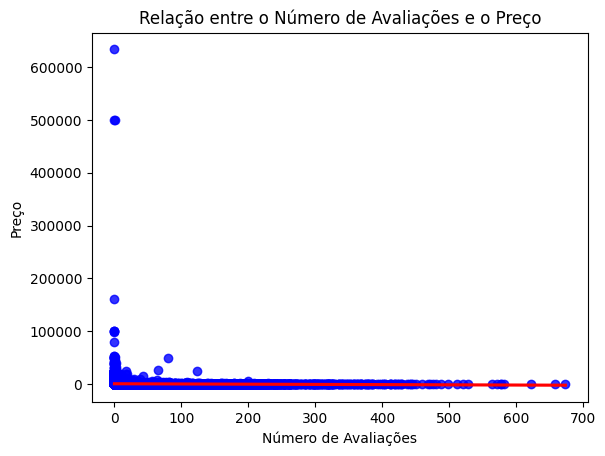

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de dispersão com linha de regressão
sns.regplot(x='Numeros de avaliações', y='Preço', data=df_dados, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

# Títulos e rótulos
plt.title("Relação entre o Número de Avaliações e o Preço")
plt.xlabel("Número de Avaliações")
plt.ylabel("Preço")
plt.show()


In [ ]:
#Relação Linear Insignificante: Os resultados (Coeficiente de Correlação:-0.032 e e a linha de regressão horizontal no gráfico) sugerem que não há uma relação linear significativa entre o número de avaliações 
# e o preço médio, apesar de a análise estatística indicar uma correlação "significativa". Concluindo que a analise final dar-se pela presença de Outliers na base de dados.